# Predicting Prices of Real Estate Listings
1. Business Understanding

Using the data gathered in the data wrangling notebook (scraped and wrangled from the Danish Real Estate Company Home). Let's try to predict the listing prices based on the features available.

## Questions
* Is it possible to predict listing prices based on characteristics of the home?
* If so, what features are most important?
* Which ones doesn't matter at all?

## Exploring the dataset
Before diving into the machine learning component let's learn a bit more about the data.

* Preparing the data
* Translating stuff
* Typecasting
* Plotting 


In [189]:
# Loading libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn import linear_model

In [131]:
df = pd.read_csv('home_data_clean_final.csv', index_col = 0)
df.reset_index(inplace = True)
df.head()

,index,Address,Area,City,HomeType,isNew,Latitude,Longitude,PostalCode,Price,...,Sewers,Basement,PriceDevelopment,Accessories,Heating,Windows,YearOfValuation,Exterior,NetOwnerFee,GrossOwnerFee
0,0,"A.D. Jørgensens Vej 75, 2. 1.",35.0,Frederiksberg,Ejerlejlighed,False,55.680726,12.494705,2000,1.350.000,...,NaN,NaN,-7%,Alle nuværende hårde hvidevarer i lejligheden ...,NaN,NaN,2018.0,NaN,5.249,4.628 kr.
1,1,"Holger Danskes Vej 14, 3. th.",46.0,Frederiksberg,Ejerlejlighed,False,55.686615,12.538356,2000,2.145.000,...,NaN,NaN,-6%,Intuition gaskomfur komfur - Matsui Fridge Do...,NaN,NaN,2018.0,NaN,8.313,7.331 kr.
2,11,"Lyøvej 5, st.. tv.",60.0,Frederiksberg,Ejerlejlighed,False,55.682940,12.524527,2000,2.875.000,...,NaN,NaN,-4%,emhætte - bordkomfur glaskeramisk - indbygni...,NaN,NaN,2018.0,NaN,10.446,9.212 kr.
3,12,"H. Schneekloths Vej 13, 5. th.",56.0,Frederiksberg,Ejerlejlighed,False,55.679928,12.506927,2000,2.750.000,...,NaN,NaN,0%,De i lejligheden hårde hvidevarer medfølger i ...,NaN,NaN,2018.0,NaN,10.075,8.884 kr.
4,30,"Howitzvej 61, 3. th.",67.0,Frederiksberg,Ejerlejlighed,True,55.680209,12.523998,2000,3.195.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8515 entries, 0 to 8514
Data columns (total 39 columns):
index                       8515 non-null int64
Address                     8515 non-null object
Area                        8505 non-null float64
City                        8515 non-null object
HomeType                    8515 non-null object
isNew                       8515 non-null bool
Latitude                    8221 non-null float64
Longitude                   8221 non-null float64
PostalCode                  8515 non-null int64
Price                       8515 non-null object
ID                          8515 non-null object
PaymentOnAccount            118 non-null object
DistanceToShopping          1227 non-null object
DistanceToTransportation    947 non-null object
DistanceToSchool            1013 non-null object
DistanceToForest            105 non-null object
DistanceToWater             338 non-null object
Balcony                     147 non-null object
Floors           

There's a large difference in number of missing values and some data types that are off. Price should definately be numeric for instance.

In [134]:
df['Price'].replace('\.', '', regex = True, inplace = True)
df['Price'] = df['Price'].astype('float64')

In [135]:
df[df.Area.isnull()]

,index,Address,Area,City,HomeType,isNew,Latitude,Longitude,PostalCode,Price,...,Sewers,Basement,PriceDevelopment,Accessories,Heating,Windows,YearOfValuation,Exterior,NetOwnerFee,GrossOwnerFee
931,6081,Zolas Alle 11,NaN,Søborg,Villa,False,55.739024,12.514744,2860,7495000.0,...,NaN,NaN,0%,Hårde hvidevarer i henhold til materialelisten,NaN,NaN,NaN,NaN,12.922,11.196 kr.
1270,8150,Maglebjergvej 4,NaN,Helsinge,Landejendom,False,56.037991,12.154882,3200,4595000.0,...,NaN,NaN,-9%,"Falmec emhætte, Siemens opvaskemaskine, Ensemn...",NaN,NaN,2017.0,NaN,3.897,3.379 kr.
2059,12552,Stenmaglebjergvej 25,NaN,Skælskør,Landejendom,False,55.274636,11.354276,4230,1535000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2460,14481,"Gl Næsgårdsvej 7, Ordrup",NaN,Fårevejle,Fritidshus,False,55.826824,11.383898,4540,2658400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3543,21411,Hovkrogvej 44,NaN,Middelfart,Fritidshus,False,55.512978,9.853400,5500,8900000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3556,21592,Gl. Byvej 8,NaN,Ullerslev,Villa,False,55.315020,10.624591,5540,1895000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3813,22996,"Sødingevej 45, Sødinge",NaN,Ringe,Landejendom,False,55.263500,10.504333,5750,2595000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4593,26625,"Kongshoved 13-15, Kegnæs",NaN,Sydals,Landejendom,False,54.881210,9.925637,6470,3495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5142,30034,"Anerbjergevej 34, Sønder Bork",NaN,Hemmet,Landejendom,False,55.815433,8.291520,6893,895000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6592,38353,"Smedegade 32, Tranebjerg",NaN,Samsø,Villa,False,55.830459,10.596026,8305,1245000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

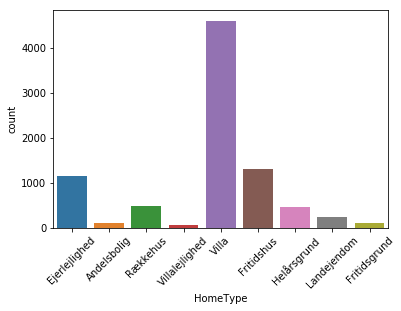

In [105]:
sb.countplot(data = df, x = 'HomeType')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

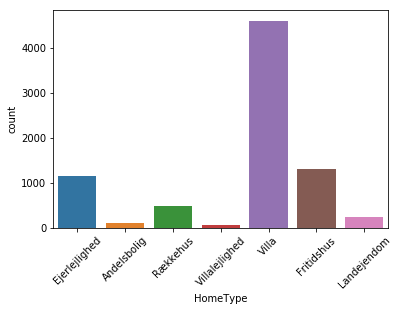

In [123]:
homes = df.query('HomeType != "Fritidsgrund" & HomeType != "Helårsgrund"')
sb.countplot(data = homes, x = 'HomeType')
plt.xticks(rotation = 45)

In [199]:
df[df.Price > 70000000]

,index,Address,Area,City,HomeType,isNew,Latitude,Longitude,PostalCode,Price,...,Sewers,Basement,PriceDevelopment,Accessories,Heating,Windows,YearOfValuation,Exterior,NetOwnerFee,GrossOwnerFee
1059,6855,Vedbæk Strandvej 328,901.0,Vedbæk,Villa,False,55.842546,12.573132,2950,75000000.0,...,Afløb til spildevandsforsyningens renseanlæg,NaN,-11%,Zanussi køle-/fryseskabVoss komfurEcoline emhæ...,Fjernvarme,Træ-alu,2017.0,Pudset,3.143,2.712 kr.


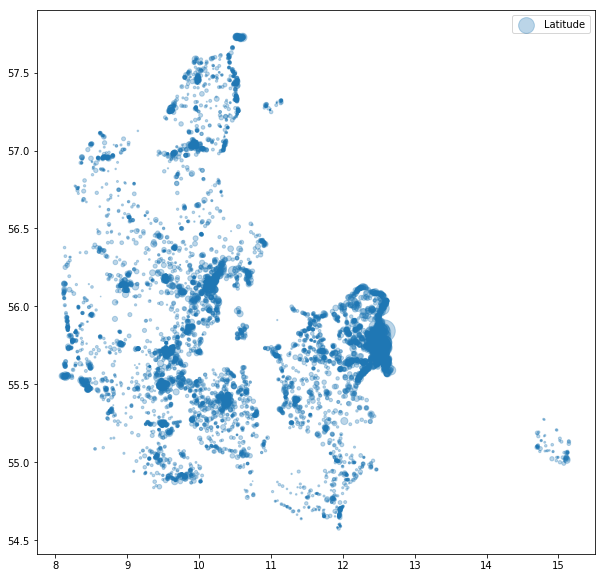

In [197]:
scale = (df['Price']/df['Price'].max()) * 500
plt.figure(figsize = [10, 10])
plt.scatter(data = df, x = 'Longitude', y = 'Latitude', s = scale, alpha = 0.3, marker = 'o')
plt.legend()

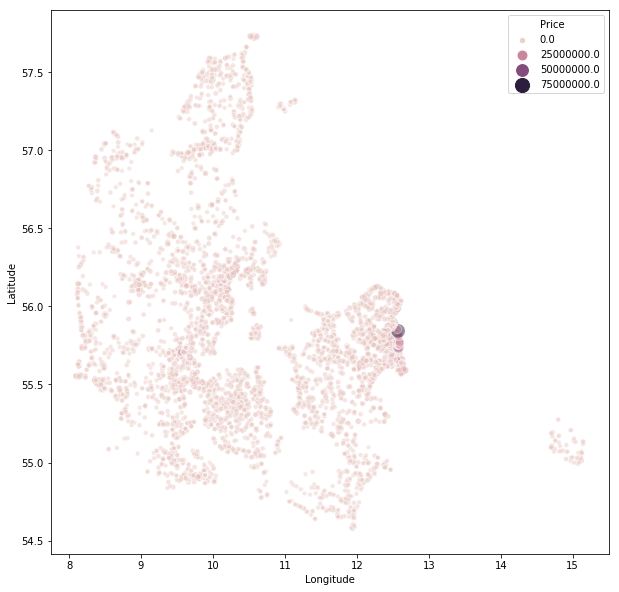

In [198]:
plt.figure(figsize = [10, 10])
sb.scatterplot(data = df, x = 'Longitude', y = 'Latitude', 
               size = 'Price', hue = 'Price', sizes=(20, 200), alpha=.5);

In [127]:
homes.query('Area > 1200')

,Address,Area,City,HomeType,isNew,Latitude,Longitude,PostalCode,Price,ID,...,Sewers,Basement,PriceDevelopment,Accessories,Heating,Windows,YearOfValuation,Exterior,NetOwnerFee,GrossOwnerFee
12763,Vemmeløsevej 28,1261.0,Dalmose,Villa,False,55.299585,11.422414,4261,2295000.0,201E00327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
reg = linear_model.LinearRegression()
lol = (homes[['Longitude', 'Latitude', 'Area', 'Price']].dropna(axis = 0, how = 'any'))
X = lol[['Longitude', 'Latitude', 'Area']]
y = lol['Price']
reg.fit(X, y)
lol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7702 entries, 0 to 51069
Data columns (total 4 columns):
Longitude    7702 non-null float64
Latitude     7702 non-null float64
Area         7702 non-null float64
Price        7702 non-null float64
dtypes: float64(4)
memory usage: 300.9 KB


In [125]:
reg.score(X, y)

0.27524659233581583

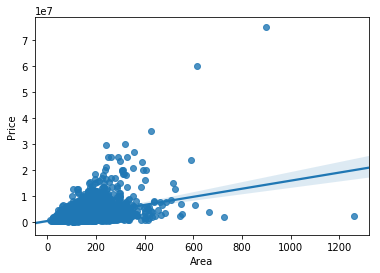

In [126]:
sb.regplot(x = lol['Area'], y = lol['Price']);

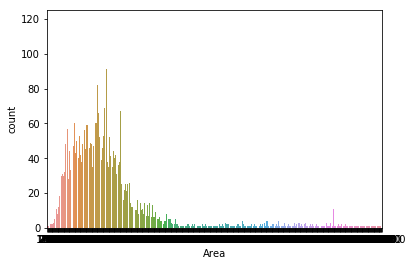

In [93]:
sb.countplot(lol.Area);

In [95]:
lol.describe()

,Longitude,Latitude,Area,Price
count,8211.000000,8211.000000,8211.000000,8.211000e+03
mean,10.614271,55.882814,236.270125,2.333138e+06
std,1.336977,0.665187,2360.100562,2.367122e+06
min,8.095746,54.574901,11.000000,9.888000e+03
25%,9.634699,55.476058,96.000000,1.095000e+06
50%,10.335854,55.733185,134.000000,1.795000e+06
75%,11.896685,56.141279,179.000000,2.895000e+06
max,15.146179,57.737277,207593.000000,7.500000e+07


In [96]:
df.query('Area == 207593')

,Address,Area,City,HomeType,isNew,Latitude,Longitude,PostalCode,Price,ID,...,Sewers,Basement,PriceDevelopment,Accessories,Heating,Windows,YearOfValuation,Exterior,NetOwnerFee,GrossOwnerFee
41399,Båstrupvej 15,207593.0,Skanderborg,Helårsgrund,False,55.998895,9.948583,8660,4495000.0,607-01623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df.loc[41399]

Address                     Båstrupvej 15
Area                               207593
City                          Skanderborg
HomeType                      Helårsgrund
isNew                               False
Latitude                          55.9989
Longitude                         9.94858
PostalCode                           8660
Price                           4.495e+06
ID                              607-01623
PaymentOnAccount                      NaN
DistanceToShopping                    NaN
DistanceToTransportation              NaN
DistanceToSchool                      NaN
DistanceToForest                      NaN
DistanceToWater                       NaN
Balcony                               NaN
Floors                                NaN
Rooms                                 NaN
Toilets                               NaN
Connection                            NaN
LivingArea                            NaN
YearOfConstruction                    NaN
EstateValue                       

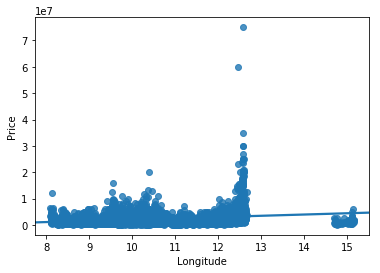

In [69]:
sb.regplot(x = lol['Longitude'], y = lol['Price']);
sb.regplot(x = lol['Longitude'], y = lol['Price']);
1
sb.regplot(x = lol['Longitude'], y = lol['Price']);

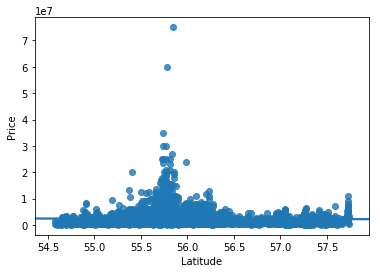

In [72]:
sb.regplot(x = lol['Latitude'], y = lol['Price']);

In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8515 entries, 0 to 51069
Data columns (total 38 columns):
Address                     8515 non-null object
Area                        8505 non-null float64
City                        8515 non-null object
HomeType                    8515 non-null object
isNew                       8515 non-null bool
Latitude                    8221 non-null float64
Longitude                   8221 non-null float64
PostalCode                  8515 non-null int64
Price                       8515 non-null float64
ID                          8515 non-null object
PaymentOnAccount            118 non-null object
DistanceToShopping          1227 non-null object
DistanceToTransportation    947 non-null object
DistanceToSchool            1013 non-null object
DistanceToForest            105 non-null object
DistanceToWater             338 non-null object
Balcony                     147 non-null object
Floors                      1077 non-null float64
Rooms        

In [ ]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    df_copy = df.copy()
    df_copy.dropna(axis=0, subset =['Salary'], inplace = True)
    X = df_copy.drop(columns=['Salary'])
    y = df_copy['Salary']
    X.drop(columns=['Respondent','ExpectedSalary'], inplace=True)
    
    cat_cols = X.select_dtypes(include='object', exclude=None)
    num_cols = list(X.select_dtypes(include=['float','int'], exclude=None).columns) 
    cat_vars = cat_vars = X.select_dtypes(include=['object']).copy().columns
    #X = pd.concat([X, pd.get_dummies(cat_cols, drop_first=True)], axis=1)
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    #X.drop(columns=list(cat_cols.columns), inplace=True)
    print(X.shape)
    fill_means = lambda col: col.fillna(col.mean())
    X[num_cols] = X[num_cols].apply(fill_means)
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    
X.shape

In [ ]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)